In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import rosen
from math import cos, sin


class GradientDescending():

    @staticmethod
    def grad(f, x, h=1e-5):
        return (f(x[:, np.newaxis] + h * np.eye(x.size)) - f(x[:, np.newaxis] - h * np.eye(x.size))) / (2 * h)

    @staticmethod
    def directed_derivative(f, x, direction, h=1e-5):
        step = direction * h
        return (f(x + step) - f(x - step)) / 2

    def one_dimension_method(self, func, x, direction, alpha, eps, max_iterations):
        return x + direction * alpha

    def find_min(self, func, initial, alpha=0.5, eps=0.001, max_iterations=0):
        points = np.zeros((0, initial.size))
        coords = initial
        for i in range(max_iterations):
            points = np.append(points, coords)
            direction = -self.grad(func, coords)
            next_coords = self.one_dimension_method(func, coords, direction, alpha, eps, max_iterations)
            delta = next_coords - coords
            if np.sqrt(delta.dot(delta)) < eps:
                return points
            coords = next_coords
        return points


class DichtGradientDescending(GradientDescending):

    def one_dimension_method(self, func, x, direction, alpha, eps, max_iterations):
        current = x
        next = x + direction*alpha
        for i in range(max_iterations):
            if np.linalg.norm(func(current) - func(next)) < eps:
                return current
            middle = (current + next) / 2
            derive = self.directed_derivative(func, middle, direction)
            if derive < 0:
                current = middle
            else:
                next = middle
        return current

In [ ]:
def g(x):
  return 0.5 * (x[0] - 10)**2 + 0.25 * (x[1]+13)**2 + 3
  
def h(x):
  return 1/100*(x[0] ** 2 + x[1] ** 2 + x[0]*x[1])
  #return cos(x[0])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

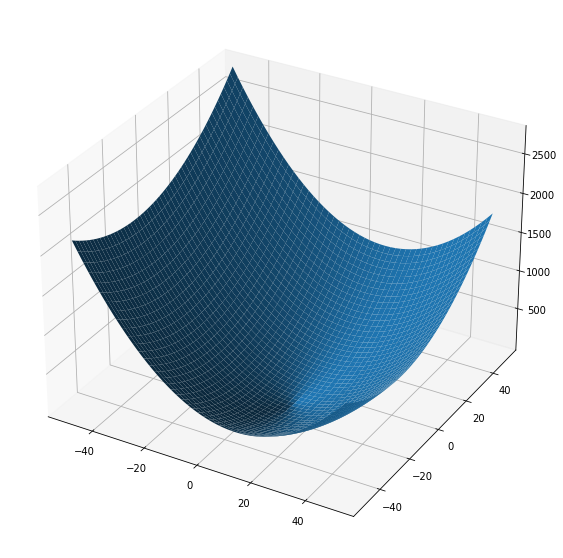

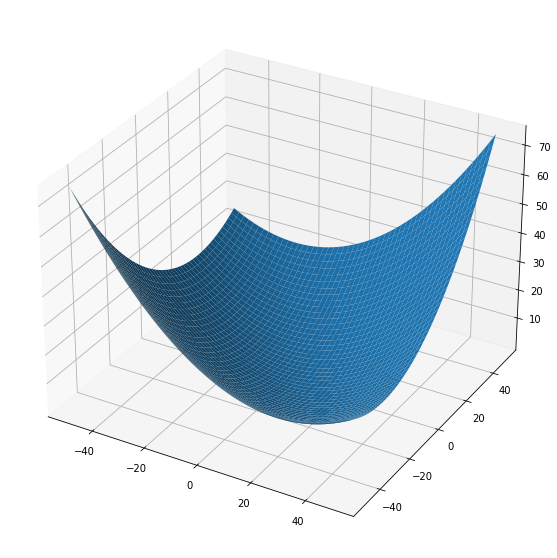

In [ ]:
t = np.linspace(-50, 50, 1000)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection="3d")
bx = plt.figure().add_subplot(projection="3d")
ax.plot_surface(X, Y, g([X, Y]))
bx.plot_surface(X, Y, h([X, Y]))

In [ ]:
alpha=0.5
max_iterations=500

30


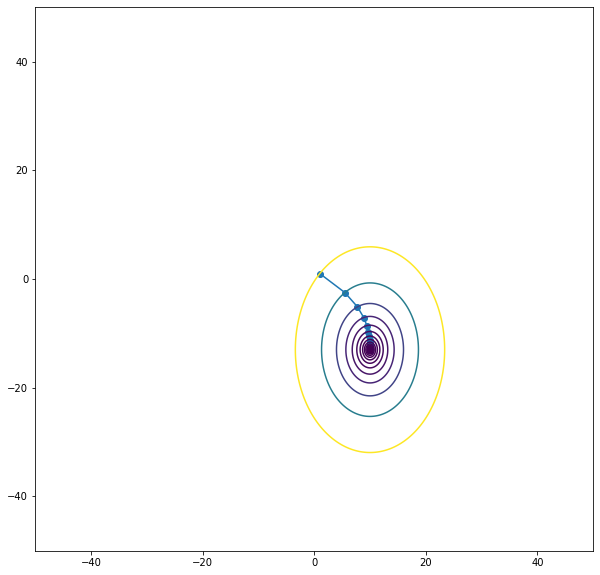

In [ ]:
points = GradientDescending().find_min(g, initial=np.array([1, 1]), alpha=alpha, max_iterations=max_iterations)
points = points.reshape(points.size // 2, 2)
#print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, g([X, Y]), levels=sorted([g([p[0], p[1]]) for p in points]))
print(points.size // 2)

#h
# points = GradientDescending().find_min(h, initial=np.array([10, 10]), alpha=alpha, max_iterations=max_iterations)
# points = points.reshape(points.size // 2, 2)
# #print(points)
# plt.plot(points[:, 0], points[:, 1], 'o-')
# plt.contour(X, Y, h([X, Y]), levels=sorted([h([p[0], p[1]]) for p in points]))
# print(points.size // 2)

341


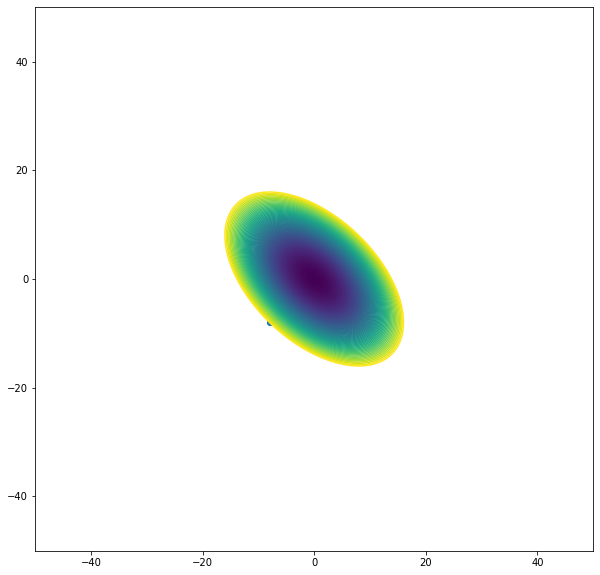

In [ ]:
h
points = GradientDescending().find_min(h, initial=np.array([-8, -8]), alpha=alpha, max_iterations=max_iterations)
points = points.reshape(points.size // 2, 2)
#print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, h([X, Y]), levels=sorted([h([p[0], p[1]]) for p in points]))
print(points.size // 2)

21


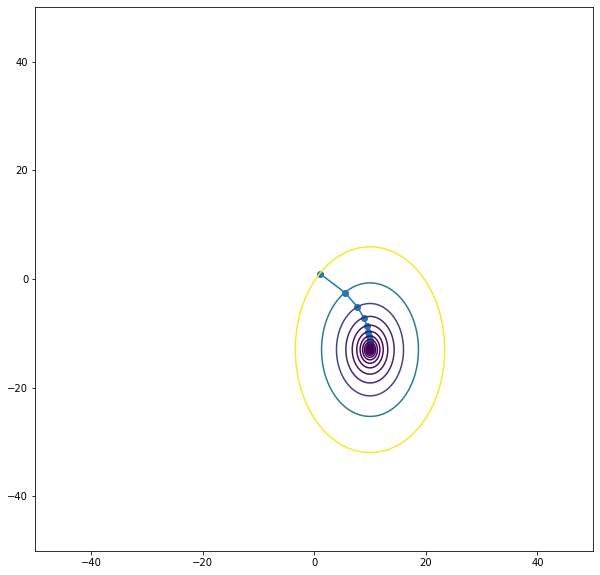

In [ ]:
points = DichtGradientDescending().find_min(g, initial=np.array([1, 1]), alpha=alpha, max_iterations=max_iterations)
points = points.reshape(points.size // 2, 2)
#print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, g([X, Y]), levels=sorted([g([p[0], p[1]]) for p in points]))
print(points.size // 2)

172


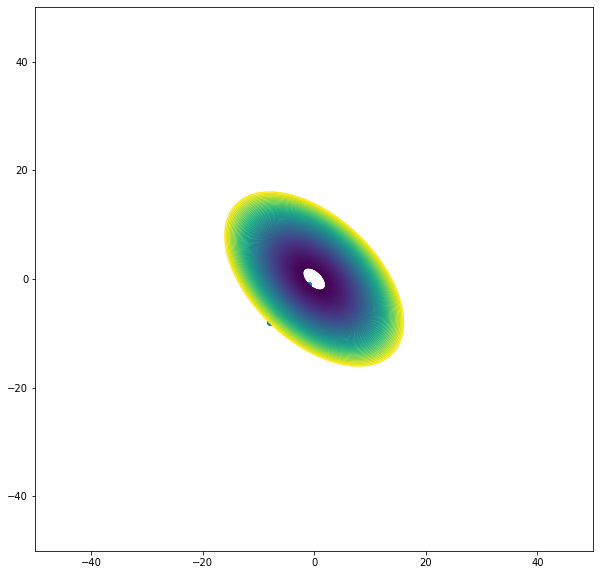

In [ ]:
h
points = DichtGradientDescending().find_min(h, initial=np.array([-8, -8]), alpha=alpha, max_iterations=max_iterations)
points = points.reshape(points.size // 2, 2)
#print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, h([X, Y]), levels=sorted([h([p[0], p[1]]) for p in points]))
print(points.size // 2)

15


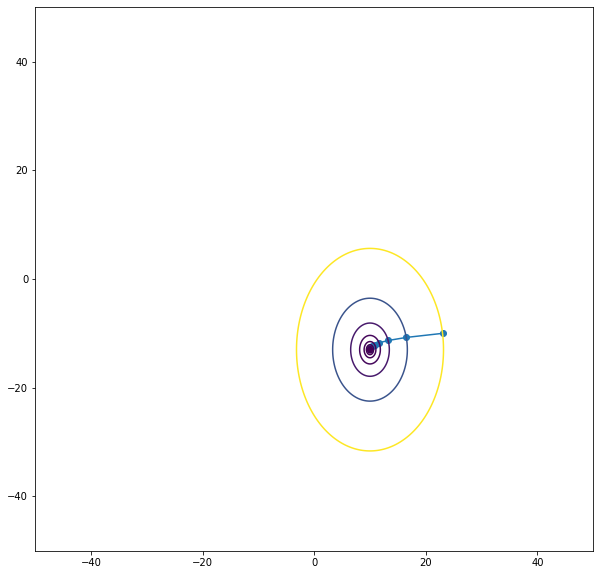

In [ ]:
points = DichtGradientDescending().find_min(g, initial=np.array([23, -10]), alpha=alpha, max_iterations=max_iterations)
points = points.reshape(points.size // 2, 2)
#print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, g([X, Y]), levels=sorted([g([p[0], p[1]]) for p in points]))
print(points.size // 2)

437


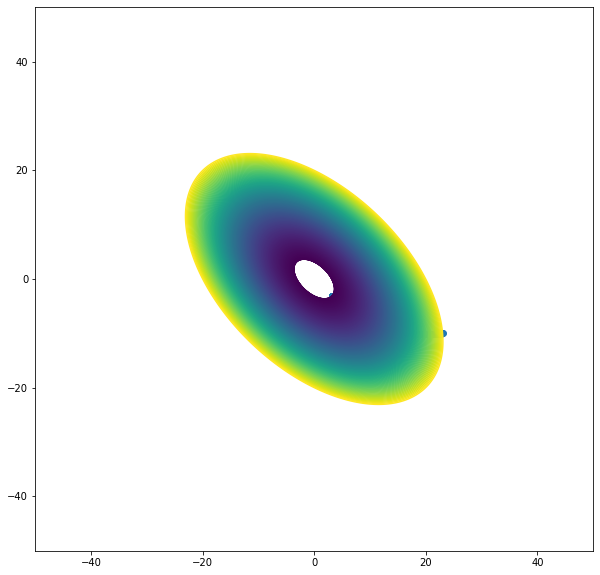

In [ ]:
h
points = DichtGradientDescending().find_min(h, initial=np.array([23, -10]), alpha=alpha, max_iterations=max_iterations)
points = points.reshape(points.size // 2, 2)
#print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, h([X, Y]), levels=sorted([h([p[0], p[1]]) for p in points]))
print(points.size // 2)

In [ ]:
l=1000

def gm(x):
  #return 0.5 * ((x[0] * l) - 10)**2 + 0.25 * ((x[1] * l) + 13)**2 + 3
  return x[0] ** 2 + x[1] ** 2
  
def hm(x):
  return 1/100*((x[0] * l) ** 2 + (x[1] * l) ** 2 + (x[0] * l) * (x[1] * l))

2


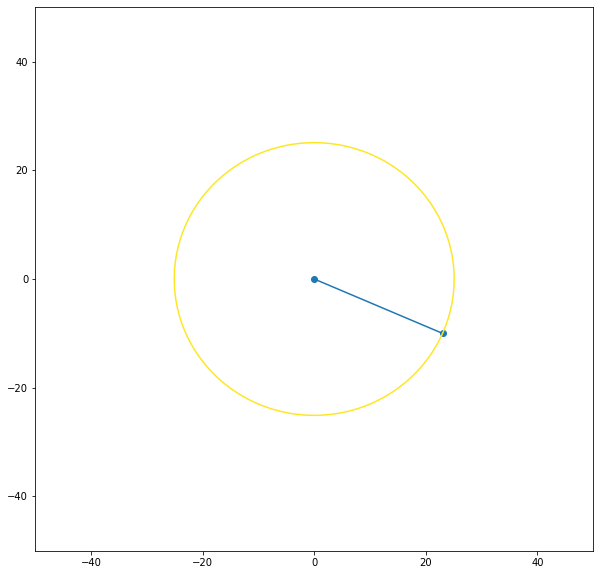

In [ ]:
points = DichtGradientDescending().find_min(gm, initial=np.array([23, -10]), alpha=alpha, max_iterations=max_iterations)
points = points.reshape(points.size // 2, 2)
#print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, gm([X, Y]), levels=sorted([gm([p[0], p[1]]) for p in points]))
print(points.size // 2)

16


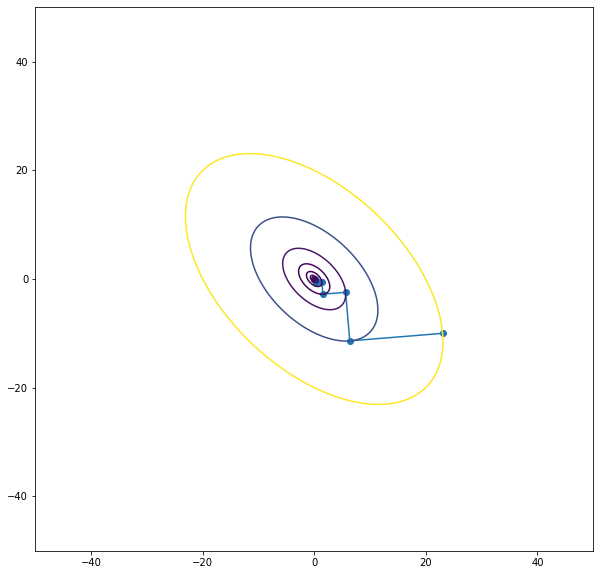

In [ ]:
h
points = DichtGradientDescending().find_min(hm, initial=np.array([23, -10]), alpha=alpha, max_iterations=max_iterations)
points = points.reshape(points.size // 2, 2)
#print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, hm([X, Y]), levels=sorted([hm([p[0], p[1]]) for p in points]))
print(points.size // 2)

In [ ]:
def t(x):
  return x[0] ** 2 + x[1] ** 2 + x[2] ** 2 + x[1] * x[2]

In [ ]:
points = GradientDescending().find_min(t, initial=np.array([5, -2, 4]), alpha=alpha, max_iterations=max_iterations)
points = points.reshape(points.size // 3, 3)
print(points)

[[ 5.00000000e+00 -2.00000000e+00  4.00000000e+00]
 [ 1.89288585e-10 -2.00000000e+00  1.00000000e+00]
 [ 1.16529009e-11 -5.00000000e-01  1.00000000e+00]
 [ 5.50670620e-13 -5.00000000e-01  2.50000000e-01]
 [ 5.50670620e-13 -1.25000000e-01  2.50000000e-01]
 [ 2.03725925e-13 -1.25000000e-01  6.25000000e-02]
 [-5.64825964e-14 -3.12500000e-02  6.25000000e-02]
 [ 8.56953397e-15 -3.12500000e-02  1.56250000e-02]
 [-2.27248775e-15 -7.81250000e-03  1.56250000e-02]
 [ 4.38017678e-16 -7.81250000e-03  3.90625000e-03]
 [ 9.92044988e-17 -1.95312500e-03  3.90625000e-03]
 [ 1.45012041e-17 -1.95312500e-03  9.76562500e-04]
 [-6.67461960e-18 -4.88281250e-04  9.76562500e-04]]
